In [2]:
import numpy as np
from scipy.io import loadmat, savemat
import scipy.signal as sg
import matplotlib.pyplot as plt
from matplotlib.lines import lineMarkers

# create epochs

In [2]:
import numpy as np
from scipy.io import loadmat, savemat

def create_epochs(n_sub):
    # Paths
    file_path = 'C:/Users/annma/Documents/IAI MSU/BCI-LLM/open-datasets/archive_kaggle/'
    mat_path = file_path + f'P300S0{n_sub}.mat'

    # Load .mat
    M = loadmat(mat_path)
    Fs = int(np.atleast_1d(M['Fs']).astype(int).ravel()[0])
    ch_names_raw = M['channelNames']
    ch_names = [str(x[0]) if isinstance(x, (list, np.ndarray)) else str(x) for x in np.atleast_1d(ch_names_raw).ravel()]
    # print('Fs:', Fs)
    # print('channels:', ch_names)
    
    # Signals
    samples = M.get('samples', None)
    if samples is None:
        samples = M['data'][0,0][0]
    assert samples.ndim == 2, 'samples must be 2D (time x channels)'
    N, C = samples.shape
    # print(samples, N, C)

    # Targets
    targets = list(str(M['Word'])[2:-2])
    # print(targets)
    tar_onsets = np.squeeze(M['data'][0][0][3])
    # print(tar_onsets)

    # Events
    events = M['data'][0,0][4]
    # print(events)
    tar_samples = []
    tar_samples_letter = []
    winlen = int(250)

    for i, _ in enumerate(tar_onsets[:-1]):
        tar_on1 = tar_onsets[i]
        if i == len(tar_onsets[:-1])-1:
            tar_on2 = len(samples)
        else:
            tar_on2 = tar_onsets[i+1]
        list_tar_events = events[(events[:,0] >= tar_on1) & (events[:,0] < tar_on2) & (events[:,-1] ==2)][:,0]
        for ev in list_tar_events:
            if len(samples[ev:ev+winlen,:]) == winlen:
                tar_samples.append(samples[ev:ev+winlen,:])
                tar_samples_letter.append(targets[i])
    tar_samples = np.array(tar_samples)
    # print(len(tar_samples), tar_samples_letter, sep='\n')
    nontar_samples = []
    nontar_samples_letter = []
    winlen = int(250)

    list_tar_events = events[(events[:,-1] ==1)][:,0]
    for ev in list_tar_events:
        if len(samples[ev:ev+winlen,:]) == winlen:
            nontar_samples.append(samples[ev:ev+winlen,:])
            nontar_samples_letter.append('None')
    # print(len(nontar_samples), nontar_samples_letter[:3], sep='\n')
    nontar_samples = np.array(nontar_samples)
    # savemat(file_path + f'epochs/epochs_S0{n_sub}.mat',
    #             {'tar_eeg': tar_samples,
    #             'tar_letters': tar_samples_letter,
    #             'nontar_eeg': nontar_samples,
    #             'nontar_letters': nontar_samples_letter})
    return tar_samples, nontar_samples


# for n_sub in range(1,9):
#     create_epochs(n_sub)

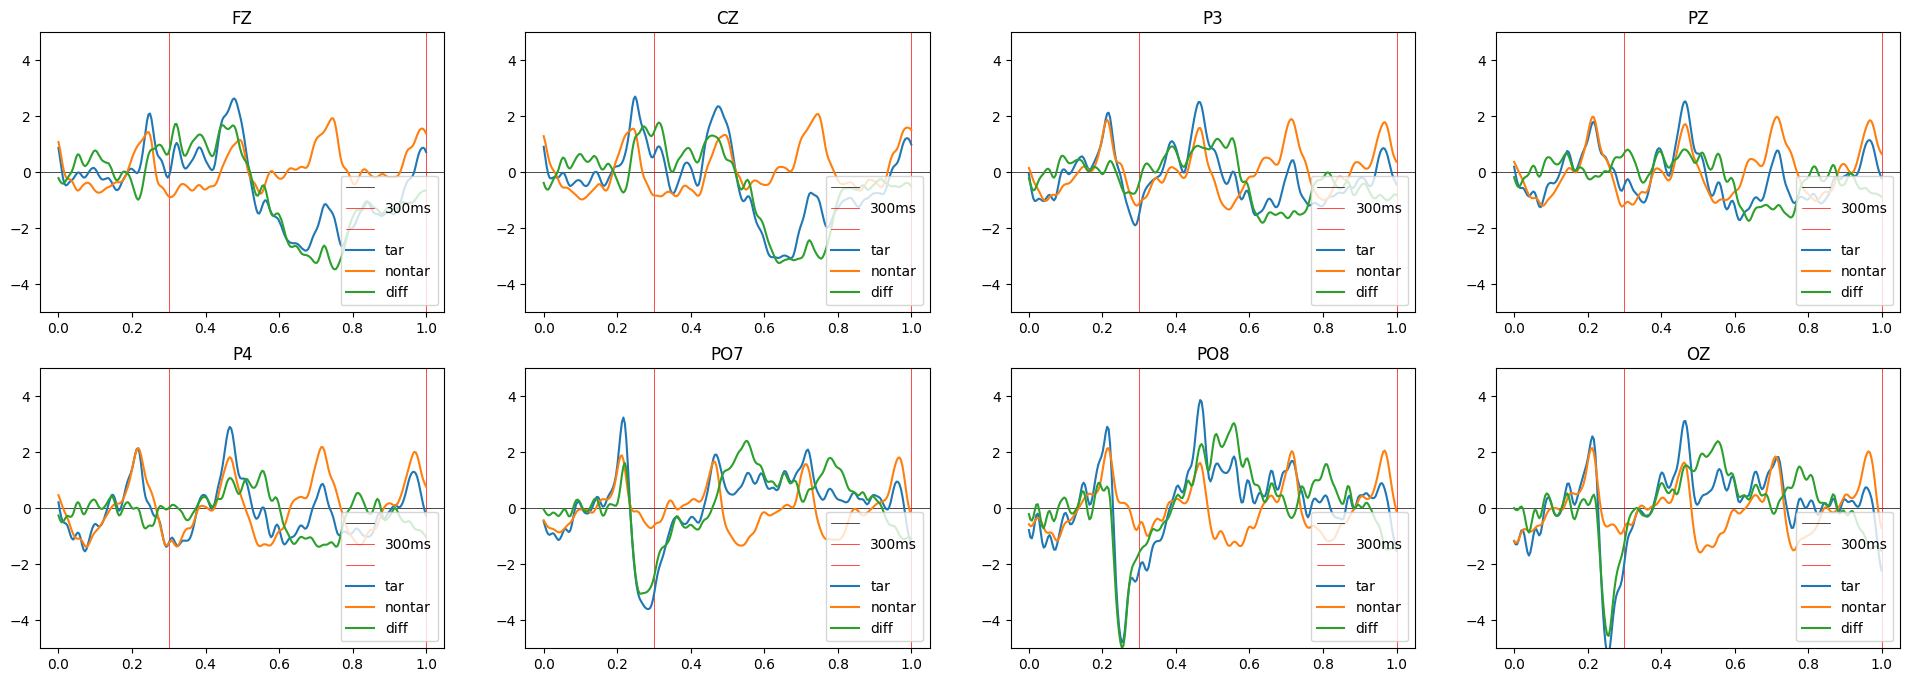

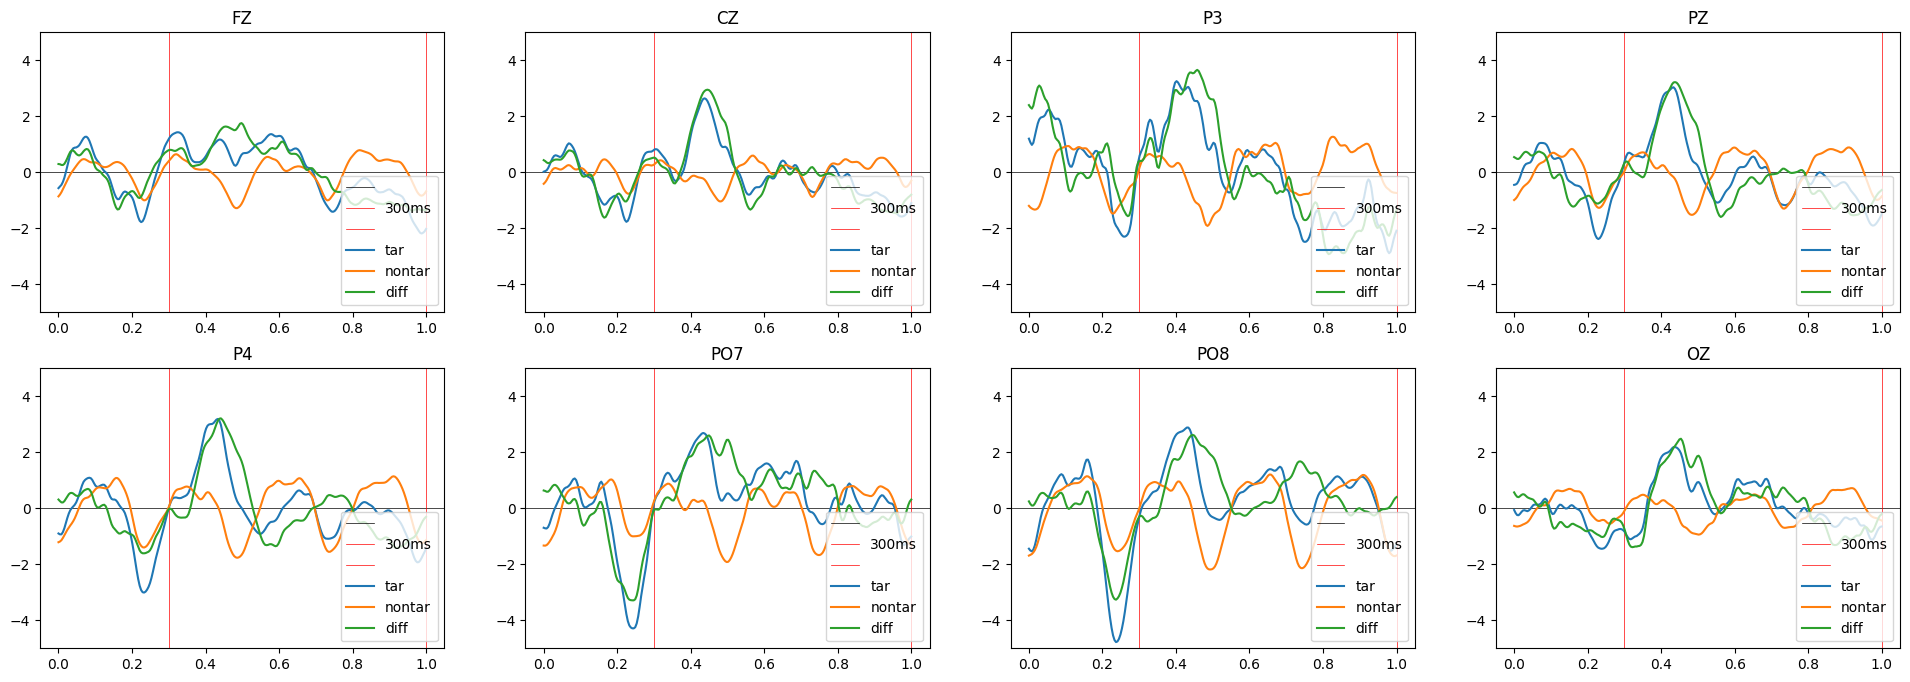

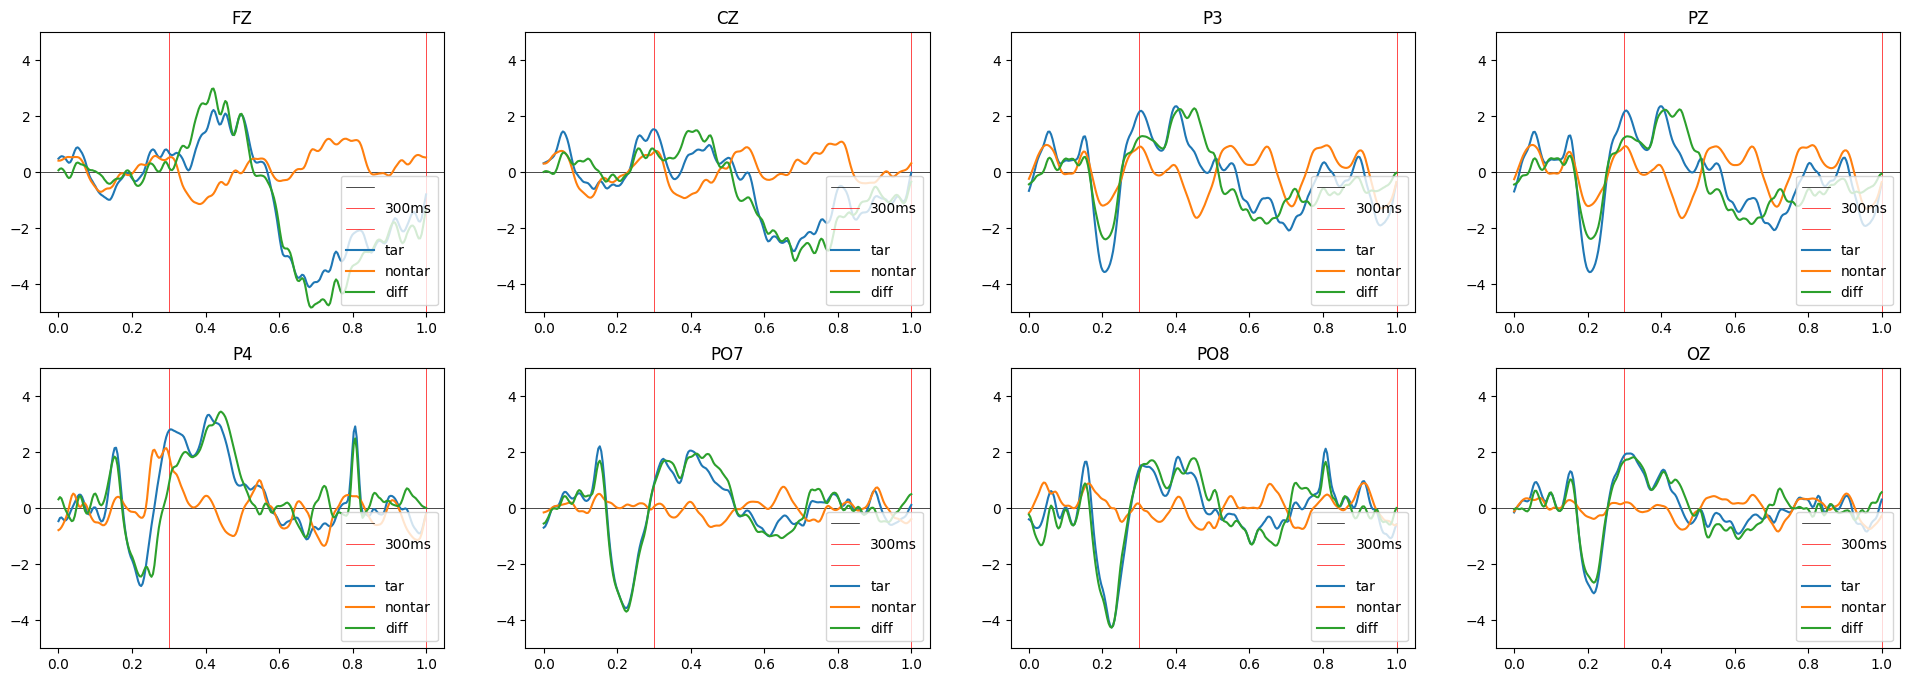

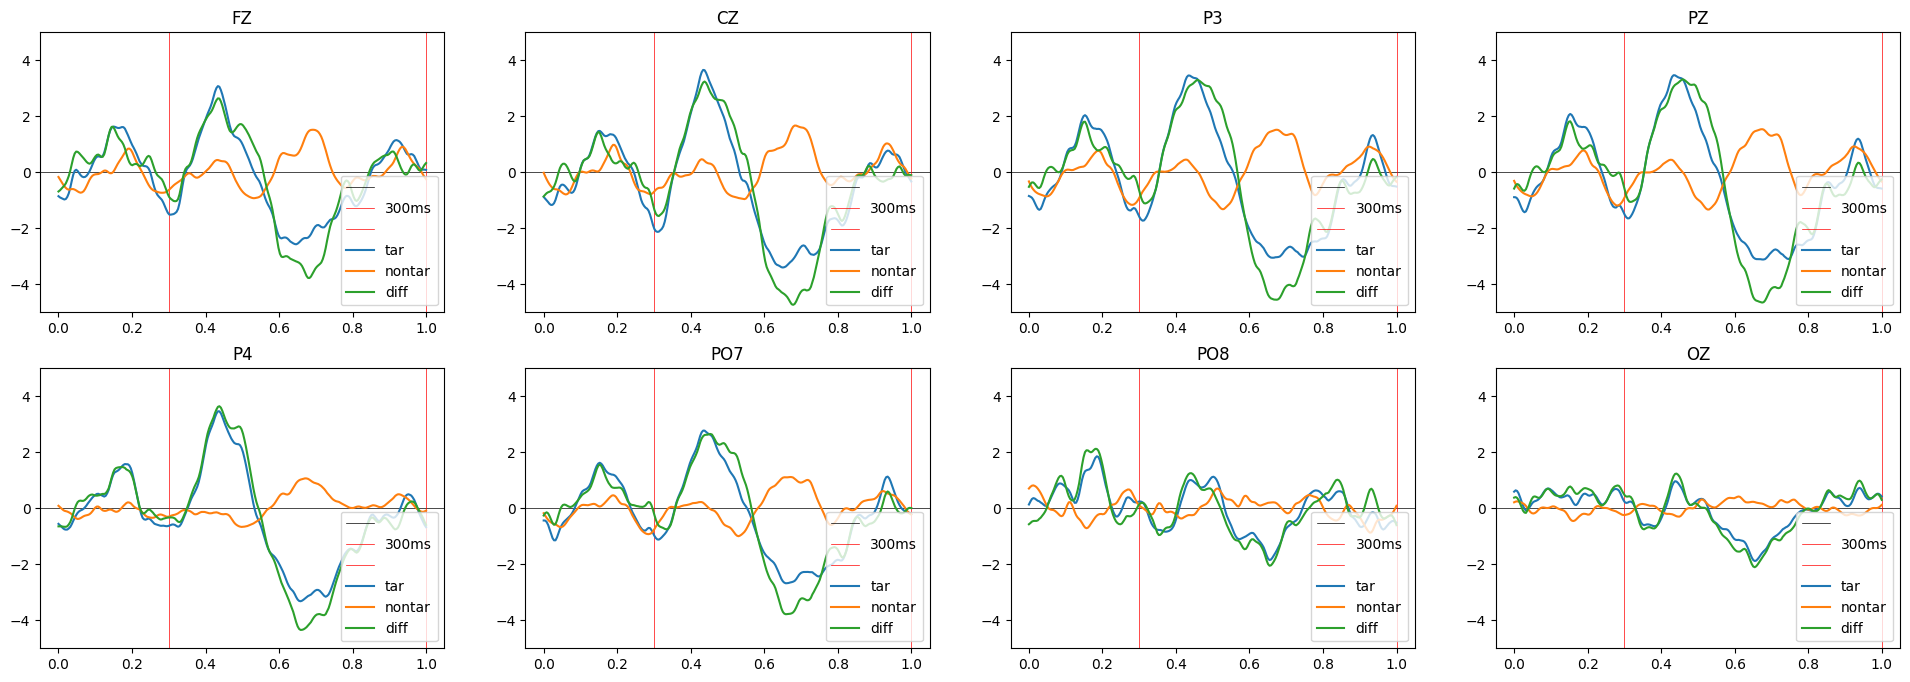

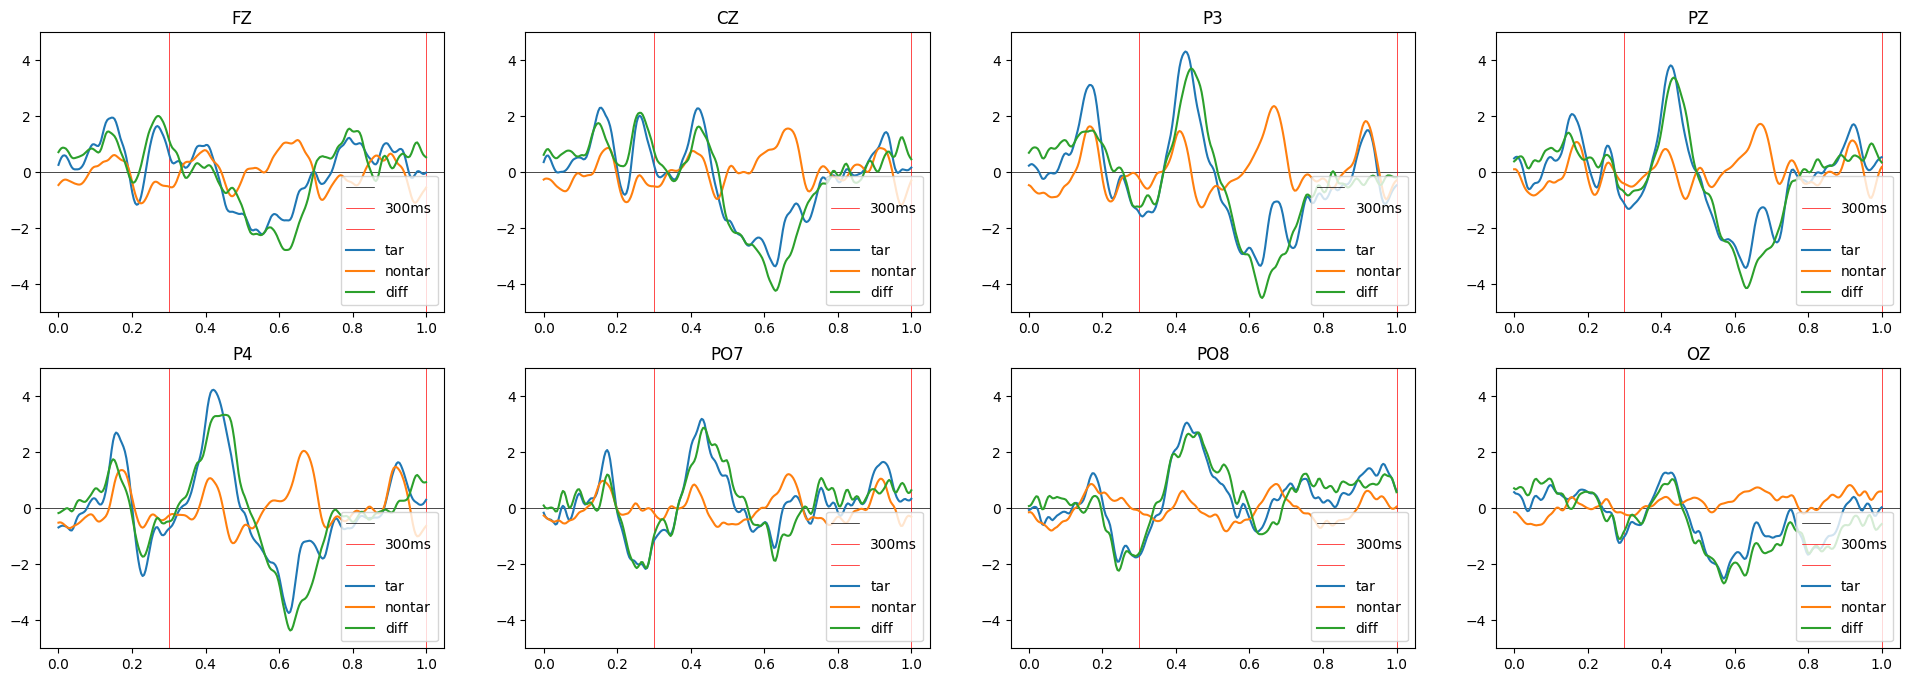

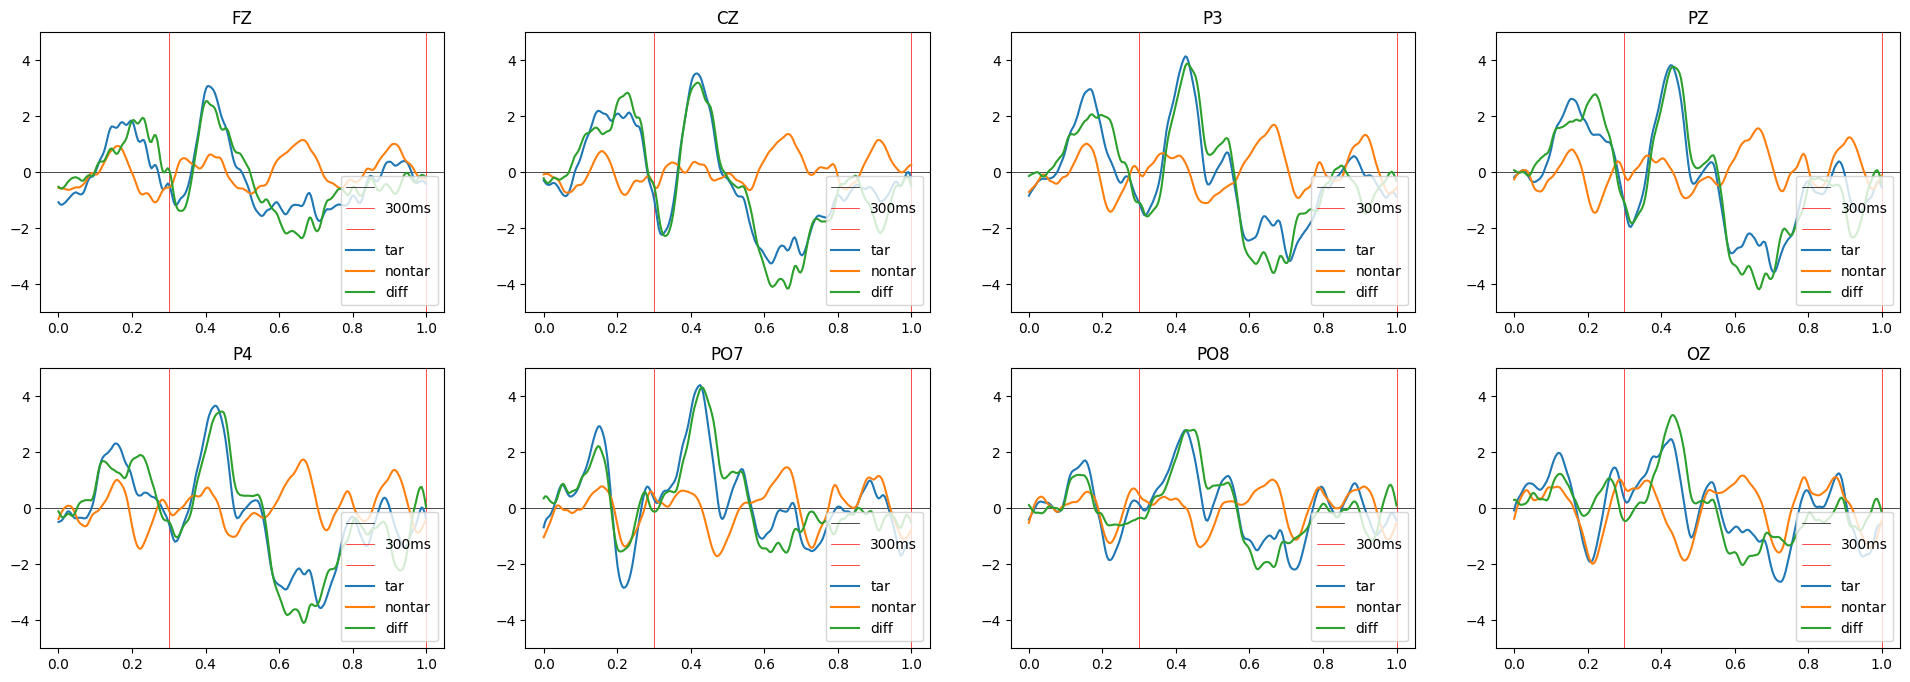

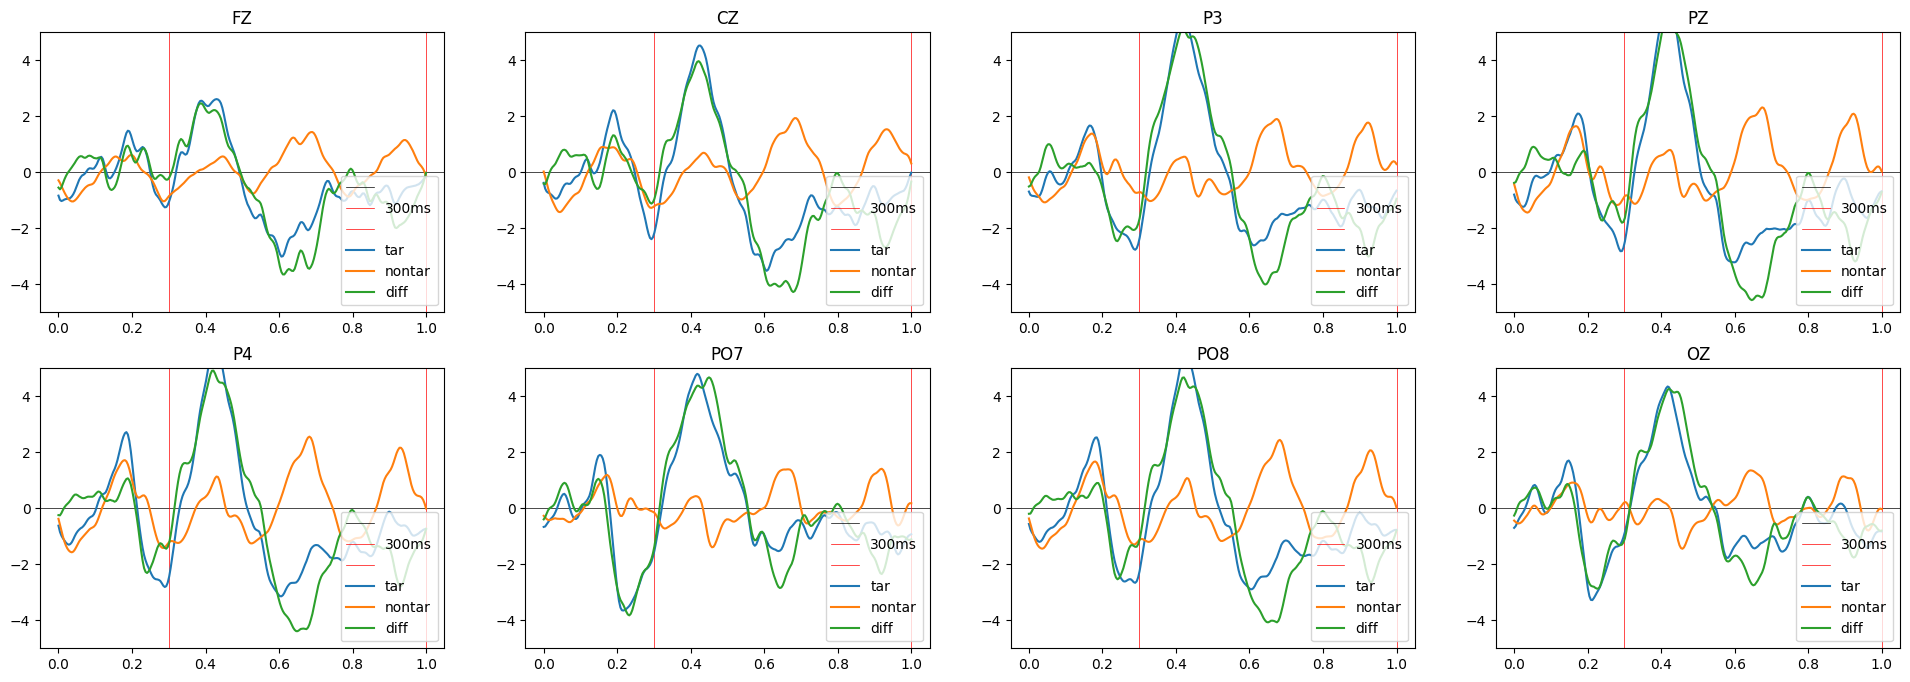

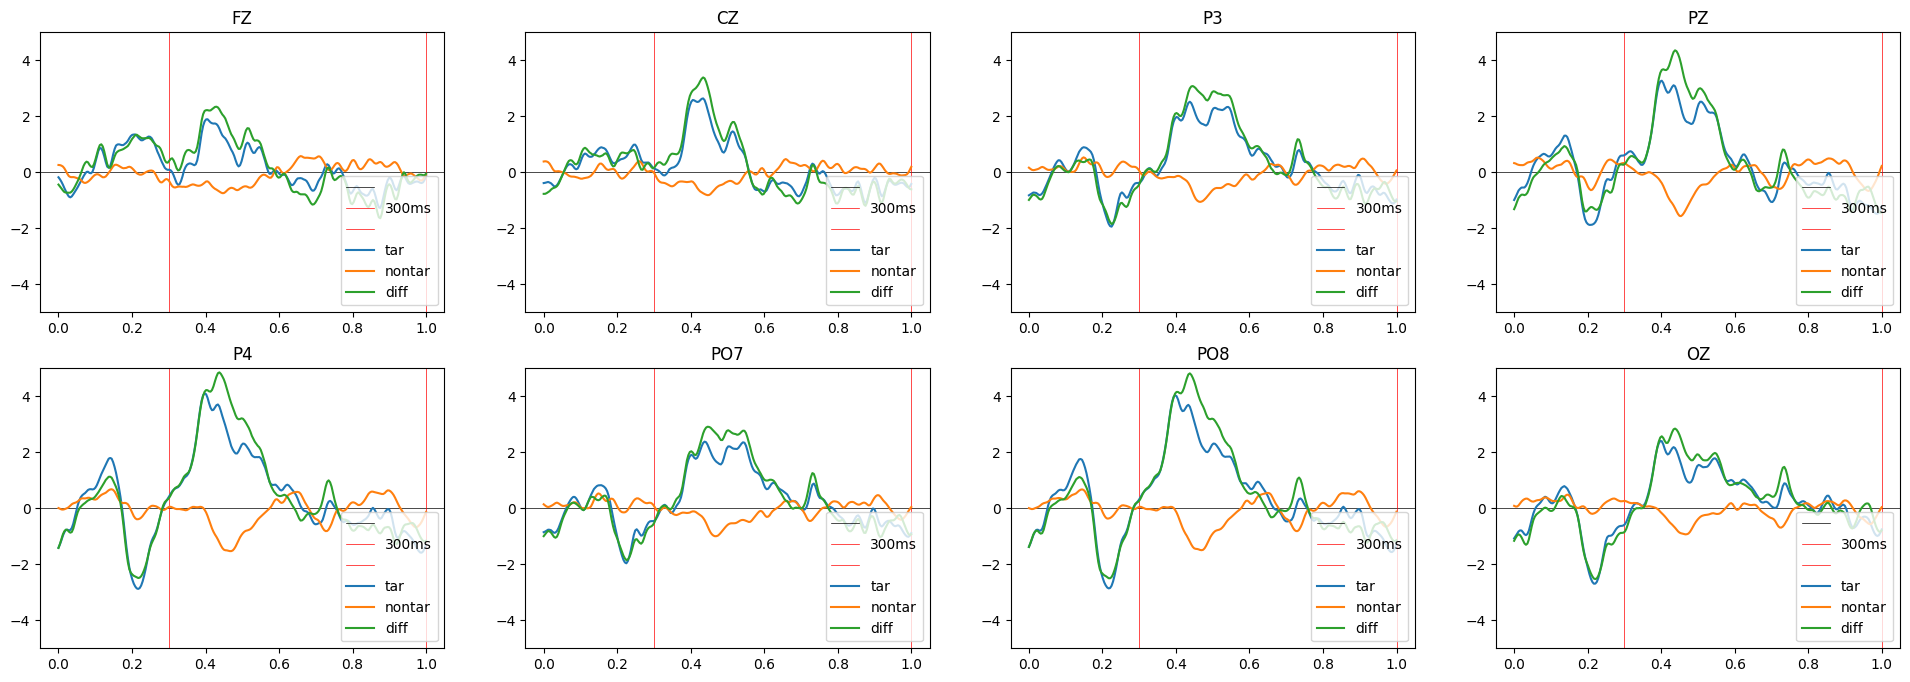

In [3]:
ch_names = ['FZ', 'CZ', 'P3', 'PZ', 'P4', 'PO7', 'PO8', 'OZ'] 
for n_sub in range(1, 9):    

    tar_samples, nontar_samples = create_epochs(n_sub)

    times_plot = np.linspace(0,1,250)

    fig, ax = plt.subplots(2,4, figsize=(24,8))

    ch_get = 0
    for i in range(2):
        for j in range(4):


            ax[i,j].axhline(0, 0, 1, c='black', linewidth=0.5)
            ax[i,j].axvline(0.3, c='red', linewidth=0.5)
            ax[i,j].axvline(1, c='red', linewidth=0.5)

            ax[i,j].plot(times_plot, np.mean(tar_samples, axis=0)[:,ch_get])
            ax[i,j].plot(times_plot, np.mean(nontar_samples, axis=0)[:,ch_get])
            ax[i,j].plot(times_plot, np.mean(tar_samples, axis=0)[:,ch_get] - np.mean(nontar_samples, axis=0)[:,ch_get])

            ax[i,j].set_title(ch_names[ch_get])
            # ax[i,j].legend(['', '300ms', '', 'tar'], loc='lower right')
            ax[i,j].legend(['', '300ms', '', 'tar', 'nontar', 'diff'], loc='lower right')
            ax[i,j].set_ylim(-5,5)

            ch_get += 1
    plt.show()
    # plt.savefig(f'C:/Users/annma/Documents/IAI MSU/BCI-LLM/open-datasets/archive_kaggle/mean_epochs_s0{sub}.png', format='png', dpi=300)